In [1]:
import torch
import json
import matplotlib.pyplot as plt

from data import MNISTDataset
from torch.utils.data import DataLoader
from model import SetFlowModule
from config import create_config

In [2]:
config = create_config()
dataset = MNISTDataset()
dataloader = DataLoader(dataset, batch_size=1)

In [3]:
sample = next(iter(dataloader))
sample = sample.to("cuda:0")
model = SetFlowModule.load_from_checkpoint(
    config=config,
    checkpoint_path="weights/20250324-204659/checkpoint-epoch=04.ckpt"
).to("cuda:0")

In [16]:
out = model.reconstruct(
    sample, 
    batch_size=111,
    timesteps=1000
)

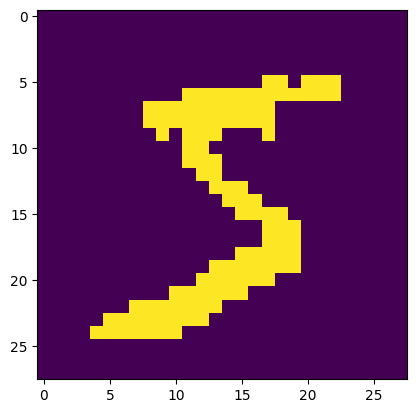

In [17]:
import numpy as np

coords = sample[0].detach().cpu().numpy()
coords *= 27

image = np.zeros((28, 28), dtype=np.float32)
for (y, x) in coords.astype(int):
    if 0 <= y < 28 and 0 <= x < 28:
        image[y, x] = 1.0
        
plt.imshow(image)

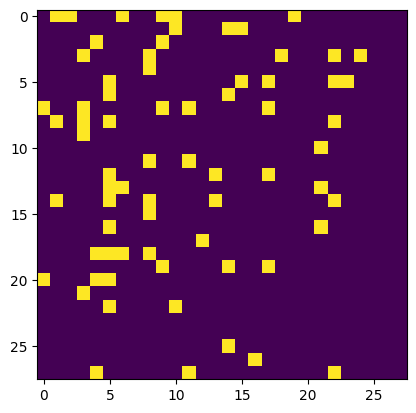

In [18]:
import numpy as np

coords = out[-1][0].detach().cpu().numpy()
coords *= 27

image = np.zeros((28, 28), dtype=np.float32)
for (y, x) in coords.astype(int):
    if 0 <= y < 28 and 0 <= x < 28:
        image[y, x] = 1.0
        
plt.imshow(image)

In [5]:
out.shape

torch.Size([50, 1, 111, 2])

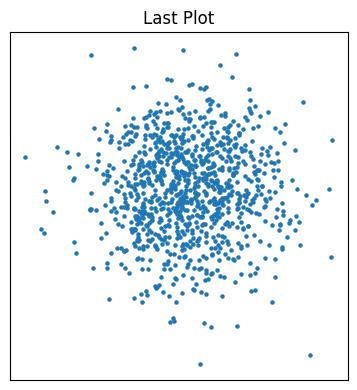

In [7]:
a = out[0]
x = a[0, :, 0].cpu().numpy()
y = a[0, :, 1].cpu().numpy()

fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size as needed

ax.scatter(x, y, s=5)
ax.set_title("Last Plot")
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect("equal")

plt.tight_layout()
plt.show()

In [15]:
out[-1].mean()

tensor(0.3394, device='cuda:0')

In [16]:
out[0].mean()

tensor(0.0062, device='cuda:0')

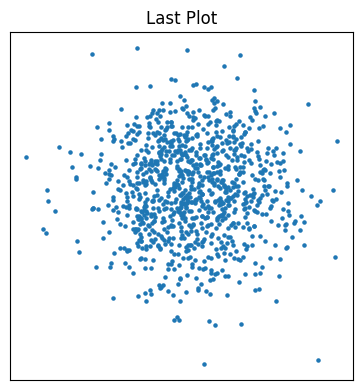

In [10]:
a = out[-1]
x = a[0, :, 0].cpu().numpy()
y = a[0, :, 1].cpu().numpy()

fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size as needed

ax.scatter(x, y, s=5)
ax.set_title("Last Plot")
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect("equal")

plt.tight_layout()
plt.show()

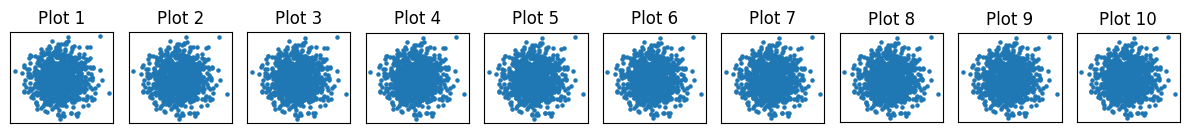

In [11]:
num_plots = out.shape[0]
fig, axes = plt.subplots(1, num_plots, figsize=(12, 2))

if num_plots == 1:
    axes = [axes]

for i in range(num_plots):
    ax = axes[i]
    x = out[i, 0, :, 0].cpu().numpy()
    y = out[i, 0, :, 1].cpu().numpy()

    ax.scatter(x, y, s=5)
    ax.set_title(f"Plot {i+1}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")

plt.tight_layout()
plt.show()


In [20]:
from flow_matching.path import AffineProbPath
from flow_matching.path.scheduler import CondOTScheduler
path = AffineProbPath(scheduler=CondOTScheduler())

In [23]:
x_1 = sample
x_0 = torch.randn_like(x_1).to(x_1.device)
t = torch.rand(x_1.shape[0]).to(x_1.device) 
path_sample = path.sample(t=t, x_0=x_0, x_1=x_1)
set_emb = torch.rand_like(sample)
pred_vf = model.decoder(x_0, t, set_emb)

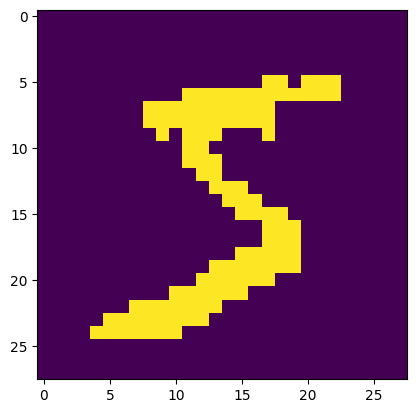

In [65]:
import numpy as np

coords = sample[0].detach().cpu().numpy()
coords *= 27

image = np.zeros((28, 28), dtype=np.float32)
for (y, x) in coords.astype(int):
    if 0 <= y < 28 and 0 <= x < 28:
        image[y, x] = 1.0
        
plt.imshow(image)